In [1]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 27.1 MB/s 
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 60.2 MB/s 
     |████████████████████████████████| 439 kB 69.8 MB/s 
     |████████████████████████████████| 1.7 MB 70.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q tf-models-official

     |████████████████████████████████| 2.3 MB 29.5 MB/s 
     |████████████████████████████████| 118 kB 73.3 MB/s 
     |████████████████████████████████| 352 kB 64.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
     |████████████████████████████████| 1.3 MB 62.7 MB/s 
     |████████████████████████████████| 662 kB 56.2 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 238 kB 73.1 MB/s 
     |████████████████████████████████| 38.2 MB 898 kB/s 


In [4]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import pandas as pd
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [5]:
dataframe=pd.read_csv('/content/drive/MyDrive/kaggle disaster Tweet/clean_train.csv')

In [6]:
data=dataframe[dataframe['text'].notnull()]

In [7]:
data

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1
...,...,...
7239,wo giant crane holding bridge colapse nearby home,1
7240,control wild fire california even northern par...,1
7241,km volcano hawai,1
7242,police investigating e bike colided car litle ...,1


In [8]:
dataframe.dropna(subset=['text'],inplace=True)

In [9]:
dataframe['text'].isnull().sum()

0

In [10]:
dataframe.describe()

,label
count,7244.000000
mean,0.440917
std,0.496531
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
dataframe.shape

(7244, 2)

In [12]:
dataframe.head()

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1


In [13]:
train = dataframe.iloc[0:,:]
valid=dataframe.iloc[7200:,:]
# test=dataframe.iloc[7100:,:]

In [14]:
from sklearn.model_selection import train_test_split

X_train=train['text'].values
X_val=valid['text'].values
y_train=train['label'].values
y_val=valid['label'].values

In [15]:
train.head()

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1


In [16]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((7244,), (44,), (7244,), (44,))

In [17]:
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [18]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [19]:
# Trying the preprocessing model on some text
text_test = ["court back sesion testimony continues med exam"]
# text_test = ["train canceled timetable changed three railway line starting june post flood work"]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_word_ids', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101  2457  2067  7367 10992 10896  4247 19960 11360   102     0     0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# Using BERT model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [21]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.4848792  -0.2068479  -0.02918513  0.14921536 -0.38582227 -0.00244466
  0.34041023  0.2350511   0.11190674 -0.9986083   0.16001779  0.14954972]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[-0.35507023 -0.32232502 -0.06724747 ...  0.11179516  0.09883354
   0.18786336]
 [ 0.01822151 -0.5929673   0.19246295 ...  0.03948095  0.7142448
  -0.23408945]
 [-0.27503407 -0.63884777  0.368361   ...  0.02395034  0.0256064
  -0.11603445]
 ...
 [ 1.0022948   0.24388808 -0.11169762 ...  0.33235043 -0.6628918
  -0.32852164]
 [-0.2378065  -0.53421676  0.25914413 ...  0.34857935 -0.17839569
  -0.22005315]
 [-0.21334237 -0.5138698   0.26569575 ...  0.36173138 -0.18026045
  -0.24659927]]


In [22]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name="BERT_encoder")
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1, name='dropout')(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(net)
  return tf.keras.Model(inputs=[text_input], outputs=[net])

In [23]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.58019084]], shape=(1, 1), dtype=float32)


In [24]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [25]:
batch_size = 16

In [26]:
X_train

array(['ded reason may alah forgive u al',
       'forest fire near la ronge sask canada',
       'al resident asked shelter place notified oficers evacuation shelter place order expected',
       ..., 'km volcano hawai',
       'police investigating e bike colided car litle portugal e bike rider sufered serious non life threatening injury',
       'latest home razed northern california wildfire abc news'],
      dtype=object)

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [28]:
epochs = 15
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [29]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocess (KerasLayer)        {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [30]:
classifier_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)

In [31]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_dataset,
                               validation_data=val_dataset,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/15
453/453 [==============================] - 293s 608ms/step - loss: 0.6074 - accuracy: 0.6944 - precision: 0.7390 - recall: 0.4743 - val_loss: 0.4488 - val_accuracy: 0.8059 - val_precision: 0.7884 - val_recall: 0.7652
Epoch 2/15
453/453 [==============================] - 275s 607ms/step - loss: 0.4808 - accuracy: 0.7869 - precision: 0.8047 - recall: 0.6822 - val_loss: 0.3293 - val_accuracy: 0.8604 - val_precision: 0.9080 - val_recall: 0.7605
Epoch 3/15
453/453 [==============================] - 275s 606ms/step - loss: 0.3594 - accuracy: 0.8563 - precision: 0.8734 - recall: 0.7884 - val_loss: 0.2411 - val_accuracy: 0.9023 - val_precision: 0.9553 - val_recall: 0.8165
Epoch 4/15
453/453 [==============================] - 275s 607ms/step - loss: 0.2660 - accuracy: 0.9031 - precision: 0.9126 - recall: 0.8629 - val_loss: 0.1842 - val_accuracy: 0.9400 - val_precision: 0.9440 - val_recall: 0.9183
Epoch

In [88]:
test=pd.read_csv('/content/drive/MyDrive/kaggle disaster Tweet/test.csv')

In [35]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [37]:
test.drop(['id','keyword','location'],axis=1,inplace=True)

In [38]:
test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [39]:
results = classifier_model.evaluate(val_dataset)

453/453 [==============================] - 70s 155ms/step - loss: 0.0366 - accuracy: 0.9836 - precision: 0.9852 - recall: 0.9775


In [40]:
loss, accuracy, precision, recall = results

In [41]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1 Score: {((2*precision*recall)/(precision + recall))*100}')

Loss: 0.03663788363337517
Accuracy: 98.35726022720337
Precision: 98.51688146591187
Recall: 97.74577617645264
F1 Score: 98.12981400584607


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


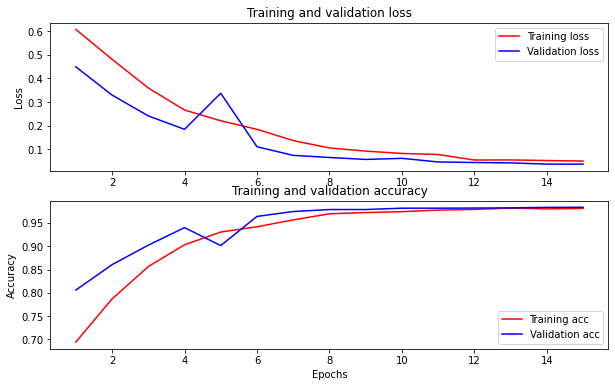

In [42]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Evaluate Training Data

In [72]:
y_predicted = classifier_model.predict(train_dataset)


453/453 [==============================] - 68s 151ms/step


In [73]:
y_predicted = y_predicted.flatten()

In [63]:
# import numpy as np
# y_predicted=np.round(y_predicted)

In [66]:
# y_predicted=[int(x) for x in y_predicted]

In [74]:
y_predicted[:10]

array([0.9999529 , 0.99999607, 0.9999926 , 0.9999918 , 0.9999646 ,
       0.999995  , 0.9999957 , 0.9999957 , 0.9999585 , 0.9999893 ],
      dtype=float32)

In [52]:
# import numpy as np
# y_predicted=np.argmax(y_predicted)

In [75]:
len(y_predicted)

7244

In [76]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4050
           1       0.99      0.98      0.98      3194

    accuracy                           0.98      7244
   macro avg       0.98      0.98      0.98      7244
weighted avg       0.98      0.98      0.98      7244



In [ ]:
import numpy as np
y_train = np.where(y_train > 0.5, 1, 0)
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_train, y_predicted)
cm

array([[4003,   47],
       [  72, 3122]])

Text(33.0, 0.5, 'Truth')

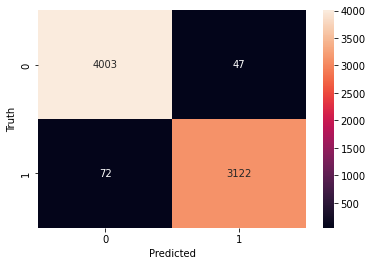

In [79]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [81]:
y_predicted_raw = classifier_model.predict(test)

102/102 [==============================] - 33s 317ms/step


## Evaluate Test Data

In [82]:
y_predicted_raw = y_predicted_raw.flatten()

# predictions_poss = y_predicted_raw
# predictions_neg = (1 - y_predicted_raw)
# predictions_poss.shape

In [89]:
y_predicted = np.where(y_predicted_raw > 0.5, 1, 0)


In [90]:
test=pd.read_csv('/content/drive/MyDrive/kaggle disaster Tweet/test.csv')

In [91]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [105]:
submit=pd.read_csv('/content/drive/MyDrive/kaggle disaster Tweet/sample_submission.csv')

In [107]:
submit=submit[['id','target']]

In [108]:
submit.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [109]:
submit['id']=test['id']

In [110]:
submit['target']=y_predicted

In [111]:
submit['target'].unique()

array([1, 0])

In [112]:
submit['target'].value_counts()

0    1931
1    1332
Name: target, dtype: int64

In [113]:
submit.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [119]:
len(submit)

3263

In [118]:
submit.to_csv('/content/drive/MyDrive/kaggle disaster Tweet/submit.csv',index=False)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(classification_report(y_test, y_predicted))
# print(accuracy_score(y_test, y_predicted))